# Tougher and Non-Elementary Integrals
Author - Dibyajyoti Chakraborty

In [1]:
import torch                              
import DNNI                               # DNNI
import matplotlib.pyplot as plt           # plotting
from scipy.integrate import quad
import numpy as np
import time
from tqdm import tqdm
torch.set_default_tensor_type(torch.DoubleTensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


# Example 1
$$\int \frac{x^2+2x+1+(3x+1)\sqrt{x+\log(x)}}{x\sqrt{x+\log(x)}(x+\sqrt{x+\log(x)})} \,dx = 2\left(\sqrt{x+\log(x)}+(\log (x+\sqrt{x+\log(x)}) \right) + c$$

In [2]:
def f1(x):
    f = ((torch.square(x)+2*x+1+(3*x+1)*torch.sqrt(x+torch.log(x)))/
         (x*torch.sqrt(x+torch.log(x))*(x+torch.sqrt(x+torch.log(x)))))
    return f

In [3]:
steps=5000
device = torch.device('cpu') #cpu performs better in this due to less points.
x = torch.linspace(1,5,100).view(-1,1)
layers = np.array([1,10,10,1])
inn = DNNI.DNNI(layers,device)
inn.to(device)
inn.closure(steps=steps,x_train=x,int_f=f1,show=True)

  3%|▎         | 127/5000 [00:00<00:03, 1259.79it/s]

Iter:  0 Loss:  2.619298647263479  lr:  0.01


 28%|██▊       | 1411/5000 [00:01<00:03, 1191.66it/s]

Iter:  1250 Loss:  3.190660227170916e-05  lr:  0.002


 54%|█████▎    | 2680/5000 [00:02<00:02, 1106.36it/s]

Iter:  2500 Loss:  2.4926224546471463e-06  lr:  0.0004


 79%|███████▉  | 3956/5000 [00:03<00:00, 1119.89it/s]

Iter:  3750 Loss:  1.8192840873610085e-06  lr:  8e-05


100%|██████████| 5000/5000 [00:04<00:00, 1162.37it/s]

MSE :  1.3298952462418155e-06


In [4]:
F = lambda x: 2*(torch.sqrt(x+torch.log(x))+torch.log(
    x+torch.sqrt(x+torch.log(x))))

In [5]:
test_x1 = torch.linspace(1,5,20).view(-1,1)
test_y1 = inn(test_x1).detach().cpu().numpy()
constant = torch.mean(F(test_x1)-test_y1)
y = test_y1 +constant.detach().cpu().numpy()

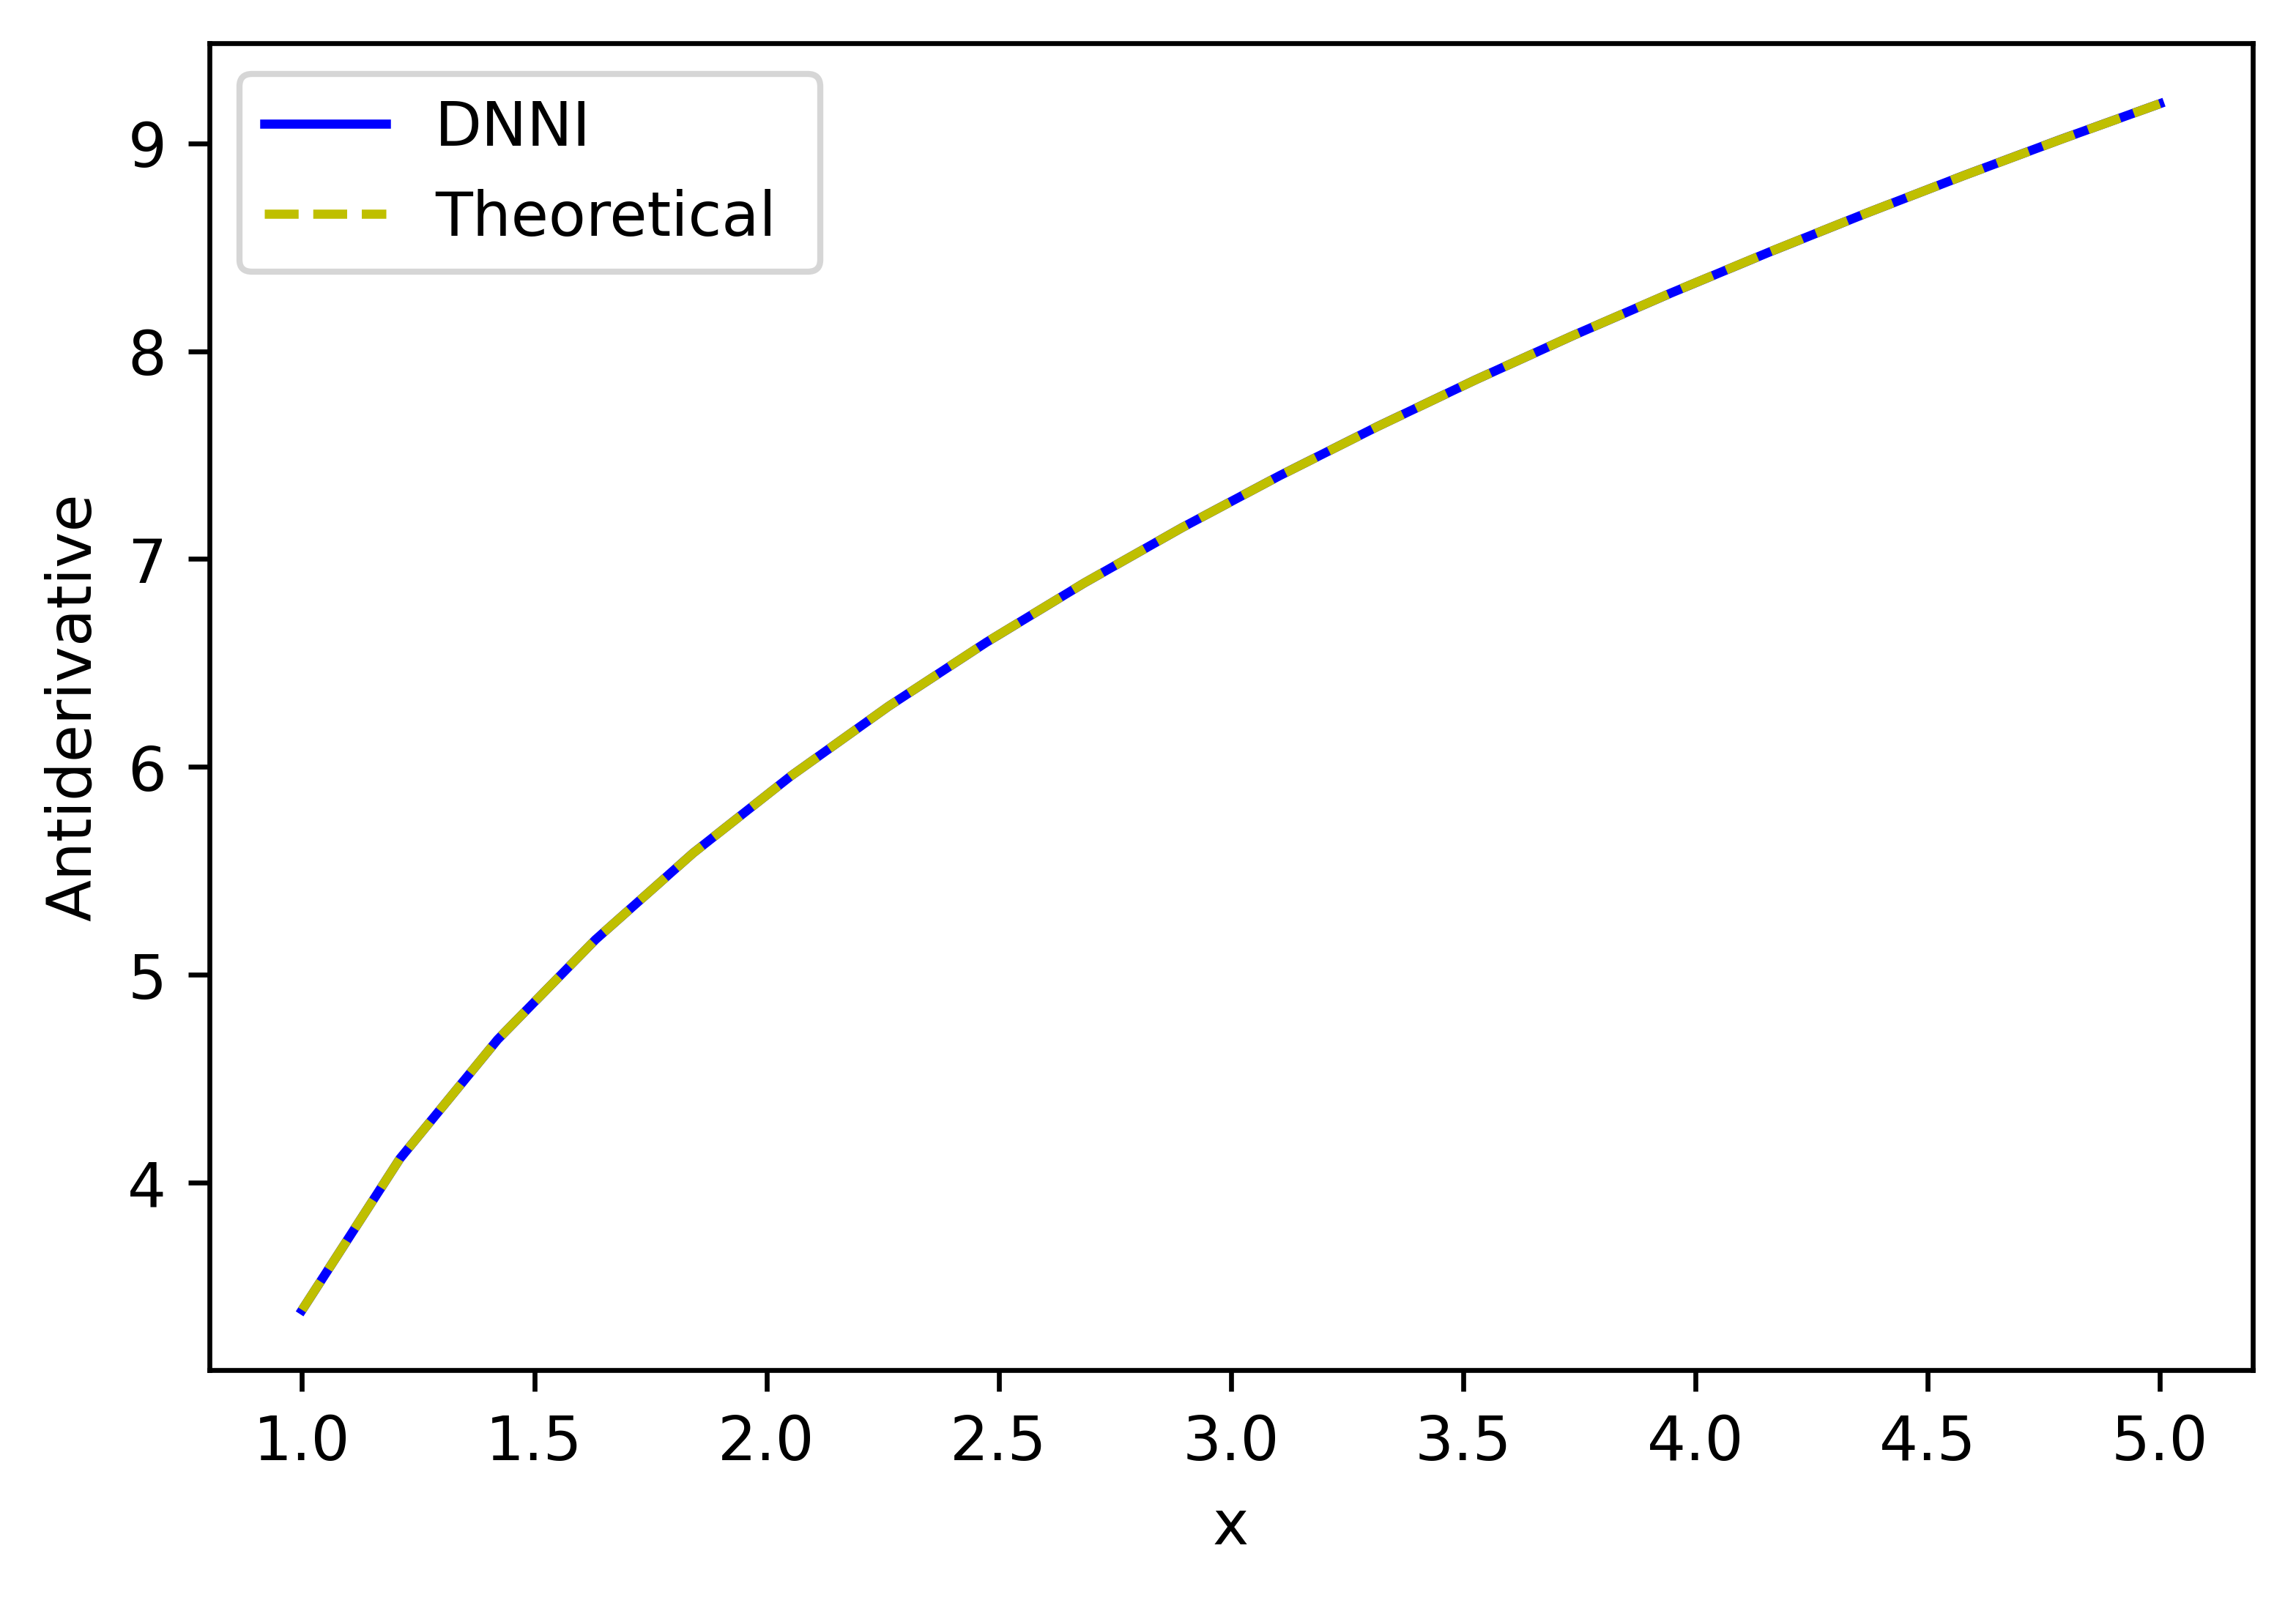

In [6]:
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')

plt.plot(test_x1,y,'b-',label='DNNI')
plt.plot(test_x1,F(test_x1),'y--',label ='Theoretical ')
plt.legend(loc=2)
plt.ylabel('Antiderivative')
plt.xlabel('x')
plt.legend()
#plt.savefig('images/tough1.png',bbox_inches='tight')

In [19]:
from sklearn.metrics import mean_squared_error
# this will take a lot of time as we are running ~500 times
l2_all = []
for j in range(5):
    l2_error = []
    for i in range(100):
        steps=2500
        x = torch.linspace(1,5,i+10).view(-1,1)
        layers = np.array([1,10,10,1])
        inn = DNNI.DNNI(layers,device)
        inn.to(device)
        inn.closure(steps=steps,x_train=x,int_f=f1,show=False)

        test_x1 = torch.linspace(1,5,85).view(-1,1) #For getting other points in the range
        test_y1 = inn(test_x1).detach().cpu().numpy()
        constant = torch.mean(F(test_x1)-test_y1)
        y = test_y1 +constant.detach().cpu().numpy() # to eliminate the constant of integration
        #print(mean_squared_error(y,F(test_x1)))
        l2_error.append(mean_squared_error(y,F(test_x1),squared=False))
    l2_all.append(l2_error)   

100%|██████████| 2500/2500 [00:01<00:00, 1484.77it/s]


100%|██████████| 2500/2500 [00:01<00:00, 1543.86it/s]


100%|██████████| 2500/2500 [00:01<00:00, 1503.70it/s]


100%|██████████| 2500/2500 [00:01<00:00, 1469.09it/s]


Text(0, 0.5, 'Mean L2_norm')

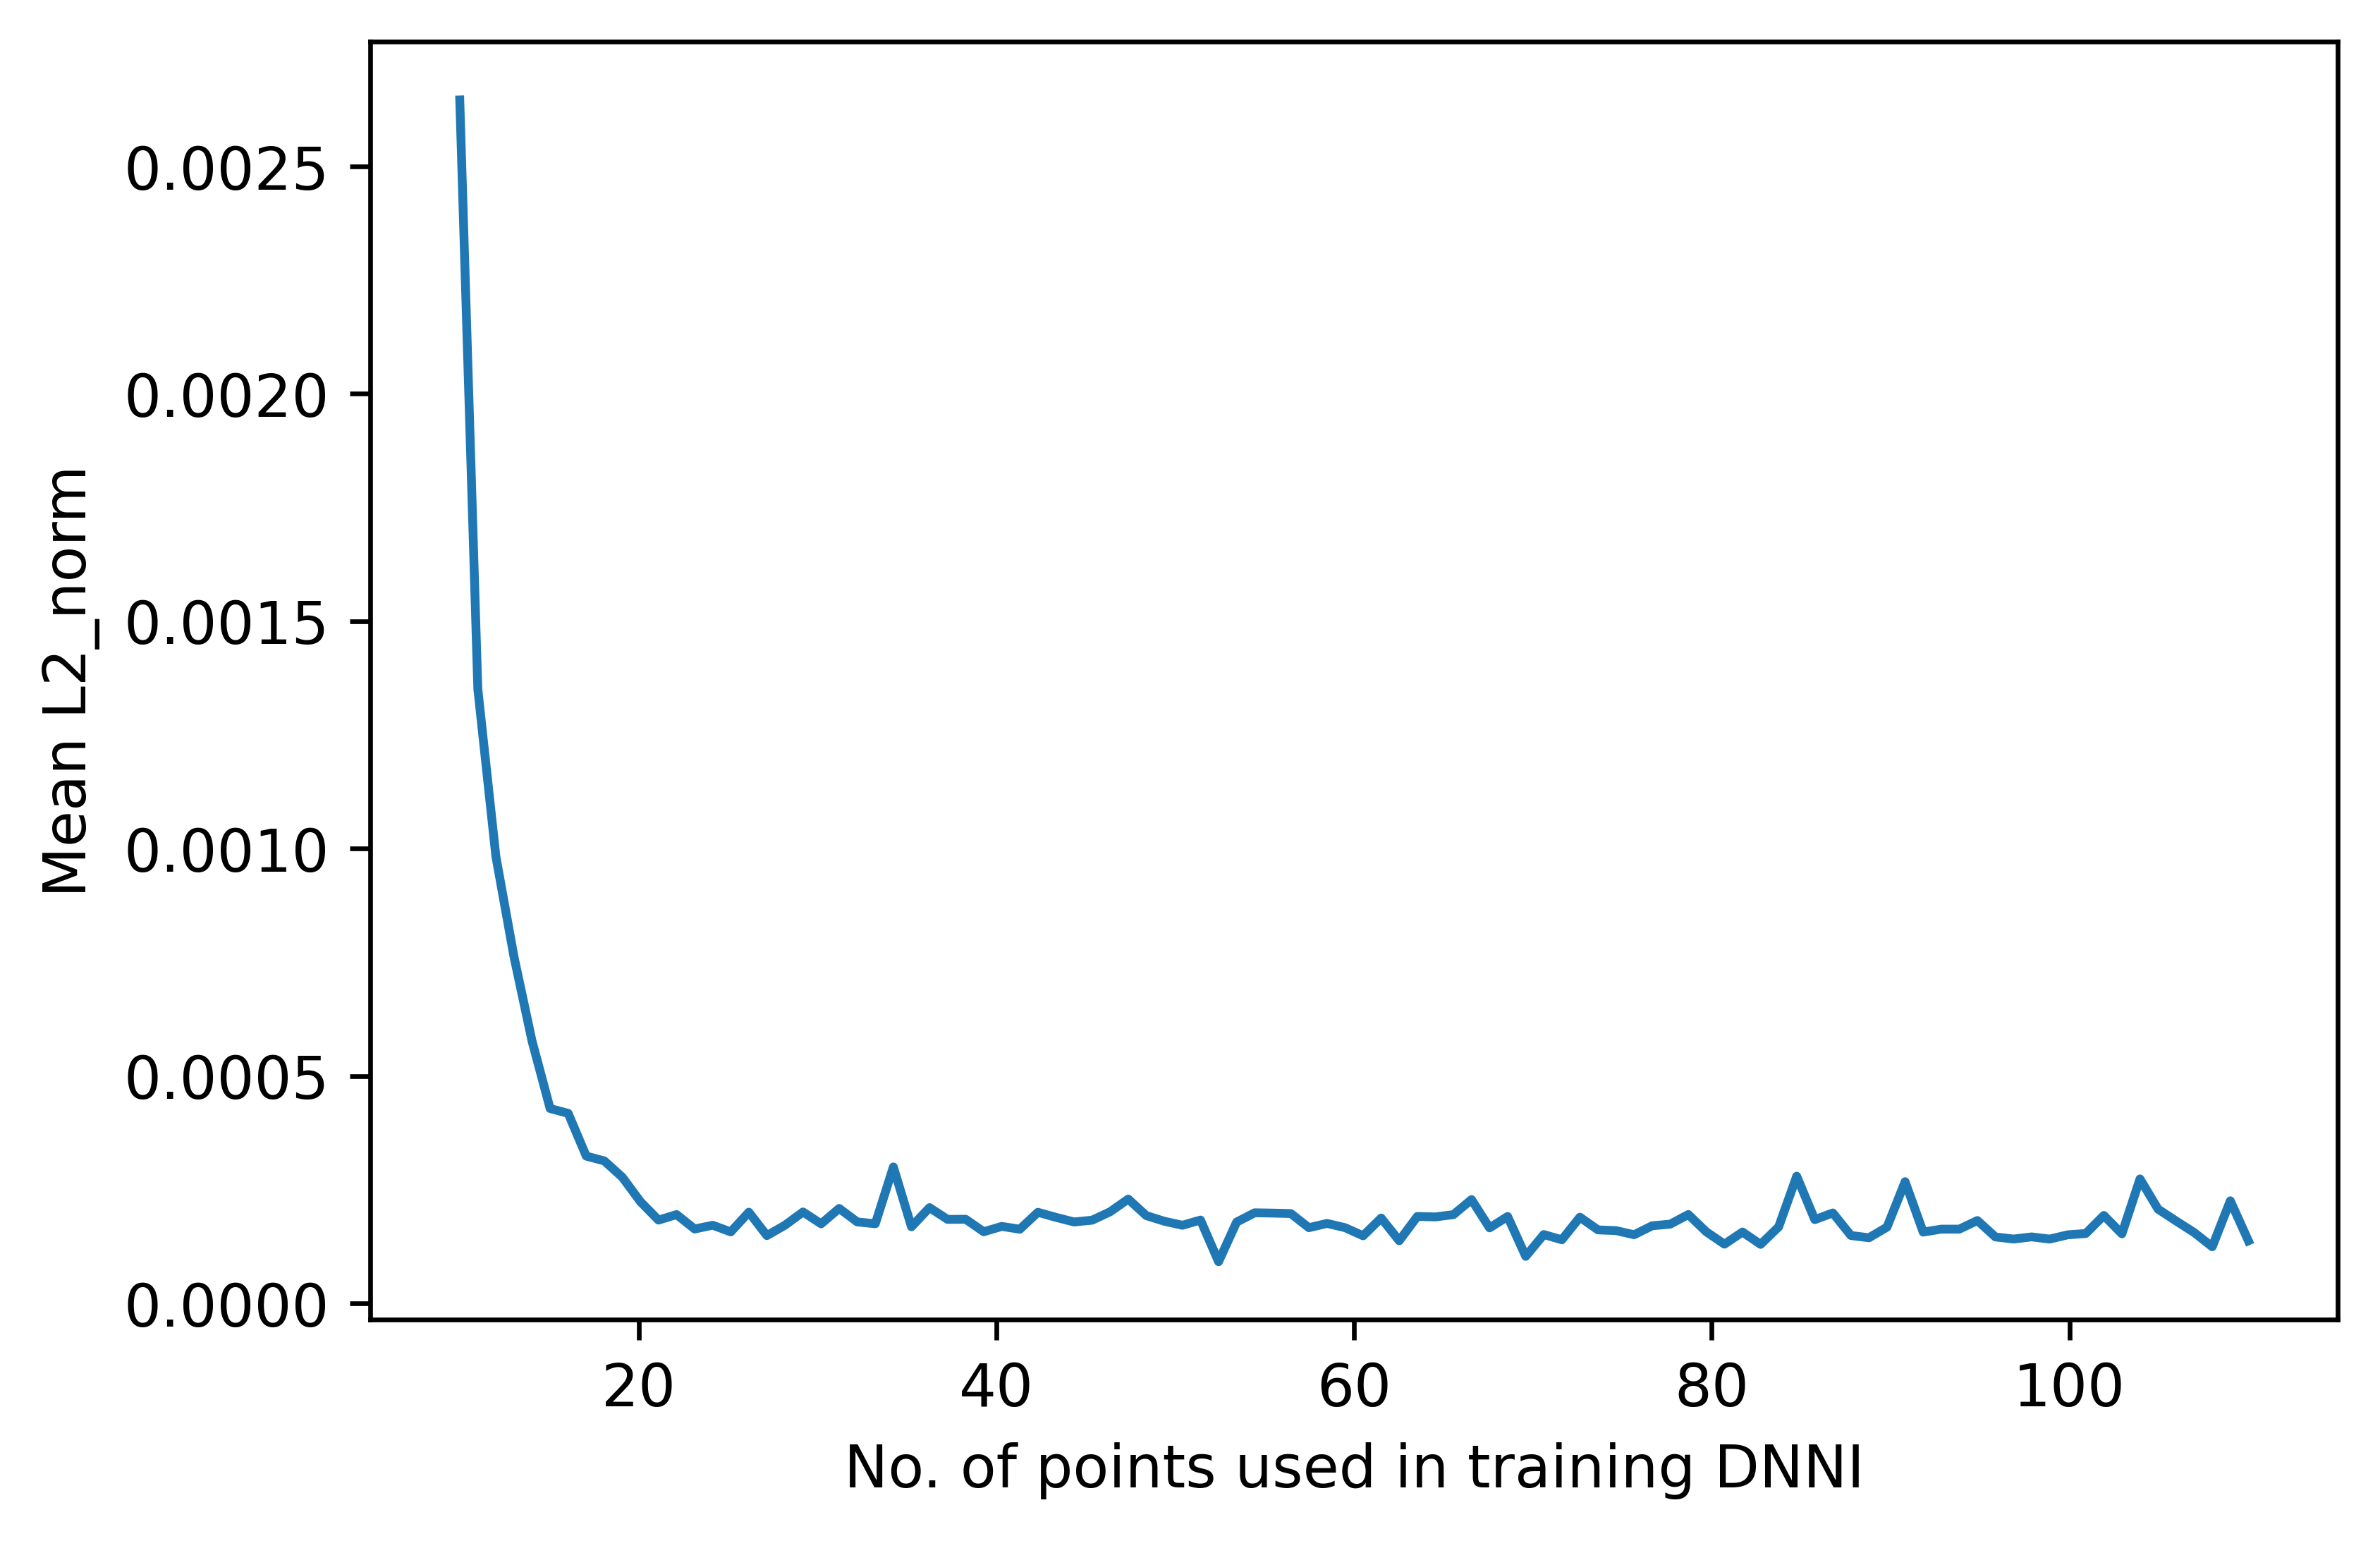

In [20]:
l2 = np.array(l2_all)
mean_l2 = (l2[0]+l2[1]+l2[2]+l2[3]+l2[4])/5

fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(np.linspace(10,110,100),mean_l2)
plt.xlabel('No. of points used in training DNNI')
plt.ylabel('Mean L2_norm')
#plt.savefig('images/Mean_Case1.png',bbox_inches='tight')

# Example 2
Non Elementary integral
$$\int x^{-x} \,dx$$

In [21]:
def f2(x):
    return torch.pow(x,-x)

In [22]:
device2 = torch.device('cpu')
steps=10000
x = torch.linspace(0,10,4000).view(-1,1) # This range can mimic 0 to infinity
layers = np.array([1,10,10,10,10,1])
inn2 = DNNI.DNNI(layers,device2)
inn2.to(device2)
inn2.closure(steps=steps,x_train=x,int_f=f2,show=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

Iter:  0 Loss:  0.17652089260941262  lr:  0.01


 26%|██▌       | 2562/10000 [00:08<00:21, 339.36it/s]

Iter:  2500 Loss:  7.64583865537417e-07  lr:  0.002


 50%|█████     | 5044/10000 [00:15<00:14, 342.08it/s]

Iter:  5000 Loss:  3.5055725983990246e-07  lr:  0.0004


 75%|███████▌  | 7547/10000 [00:23<00:07, 330.37it/s]

Iter:  7500 Loss:  1.5593228694782825e-07  lr:  8e-05


100%|██████████| 10000/10000 [00:30<00:00, 327.40it/s]

MSE :  1.033300450825721e-07


In [23]:
test_x = torch.linspace(0,10,501).view(-1,1)
test_y = inn2(test_x).detach().cpu().numpy()
func = f2(test_x)

Text(0, 0.5, 'function $x^{-x}$')

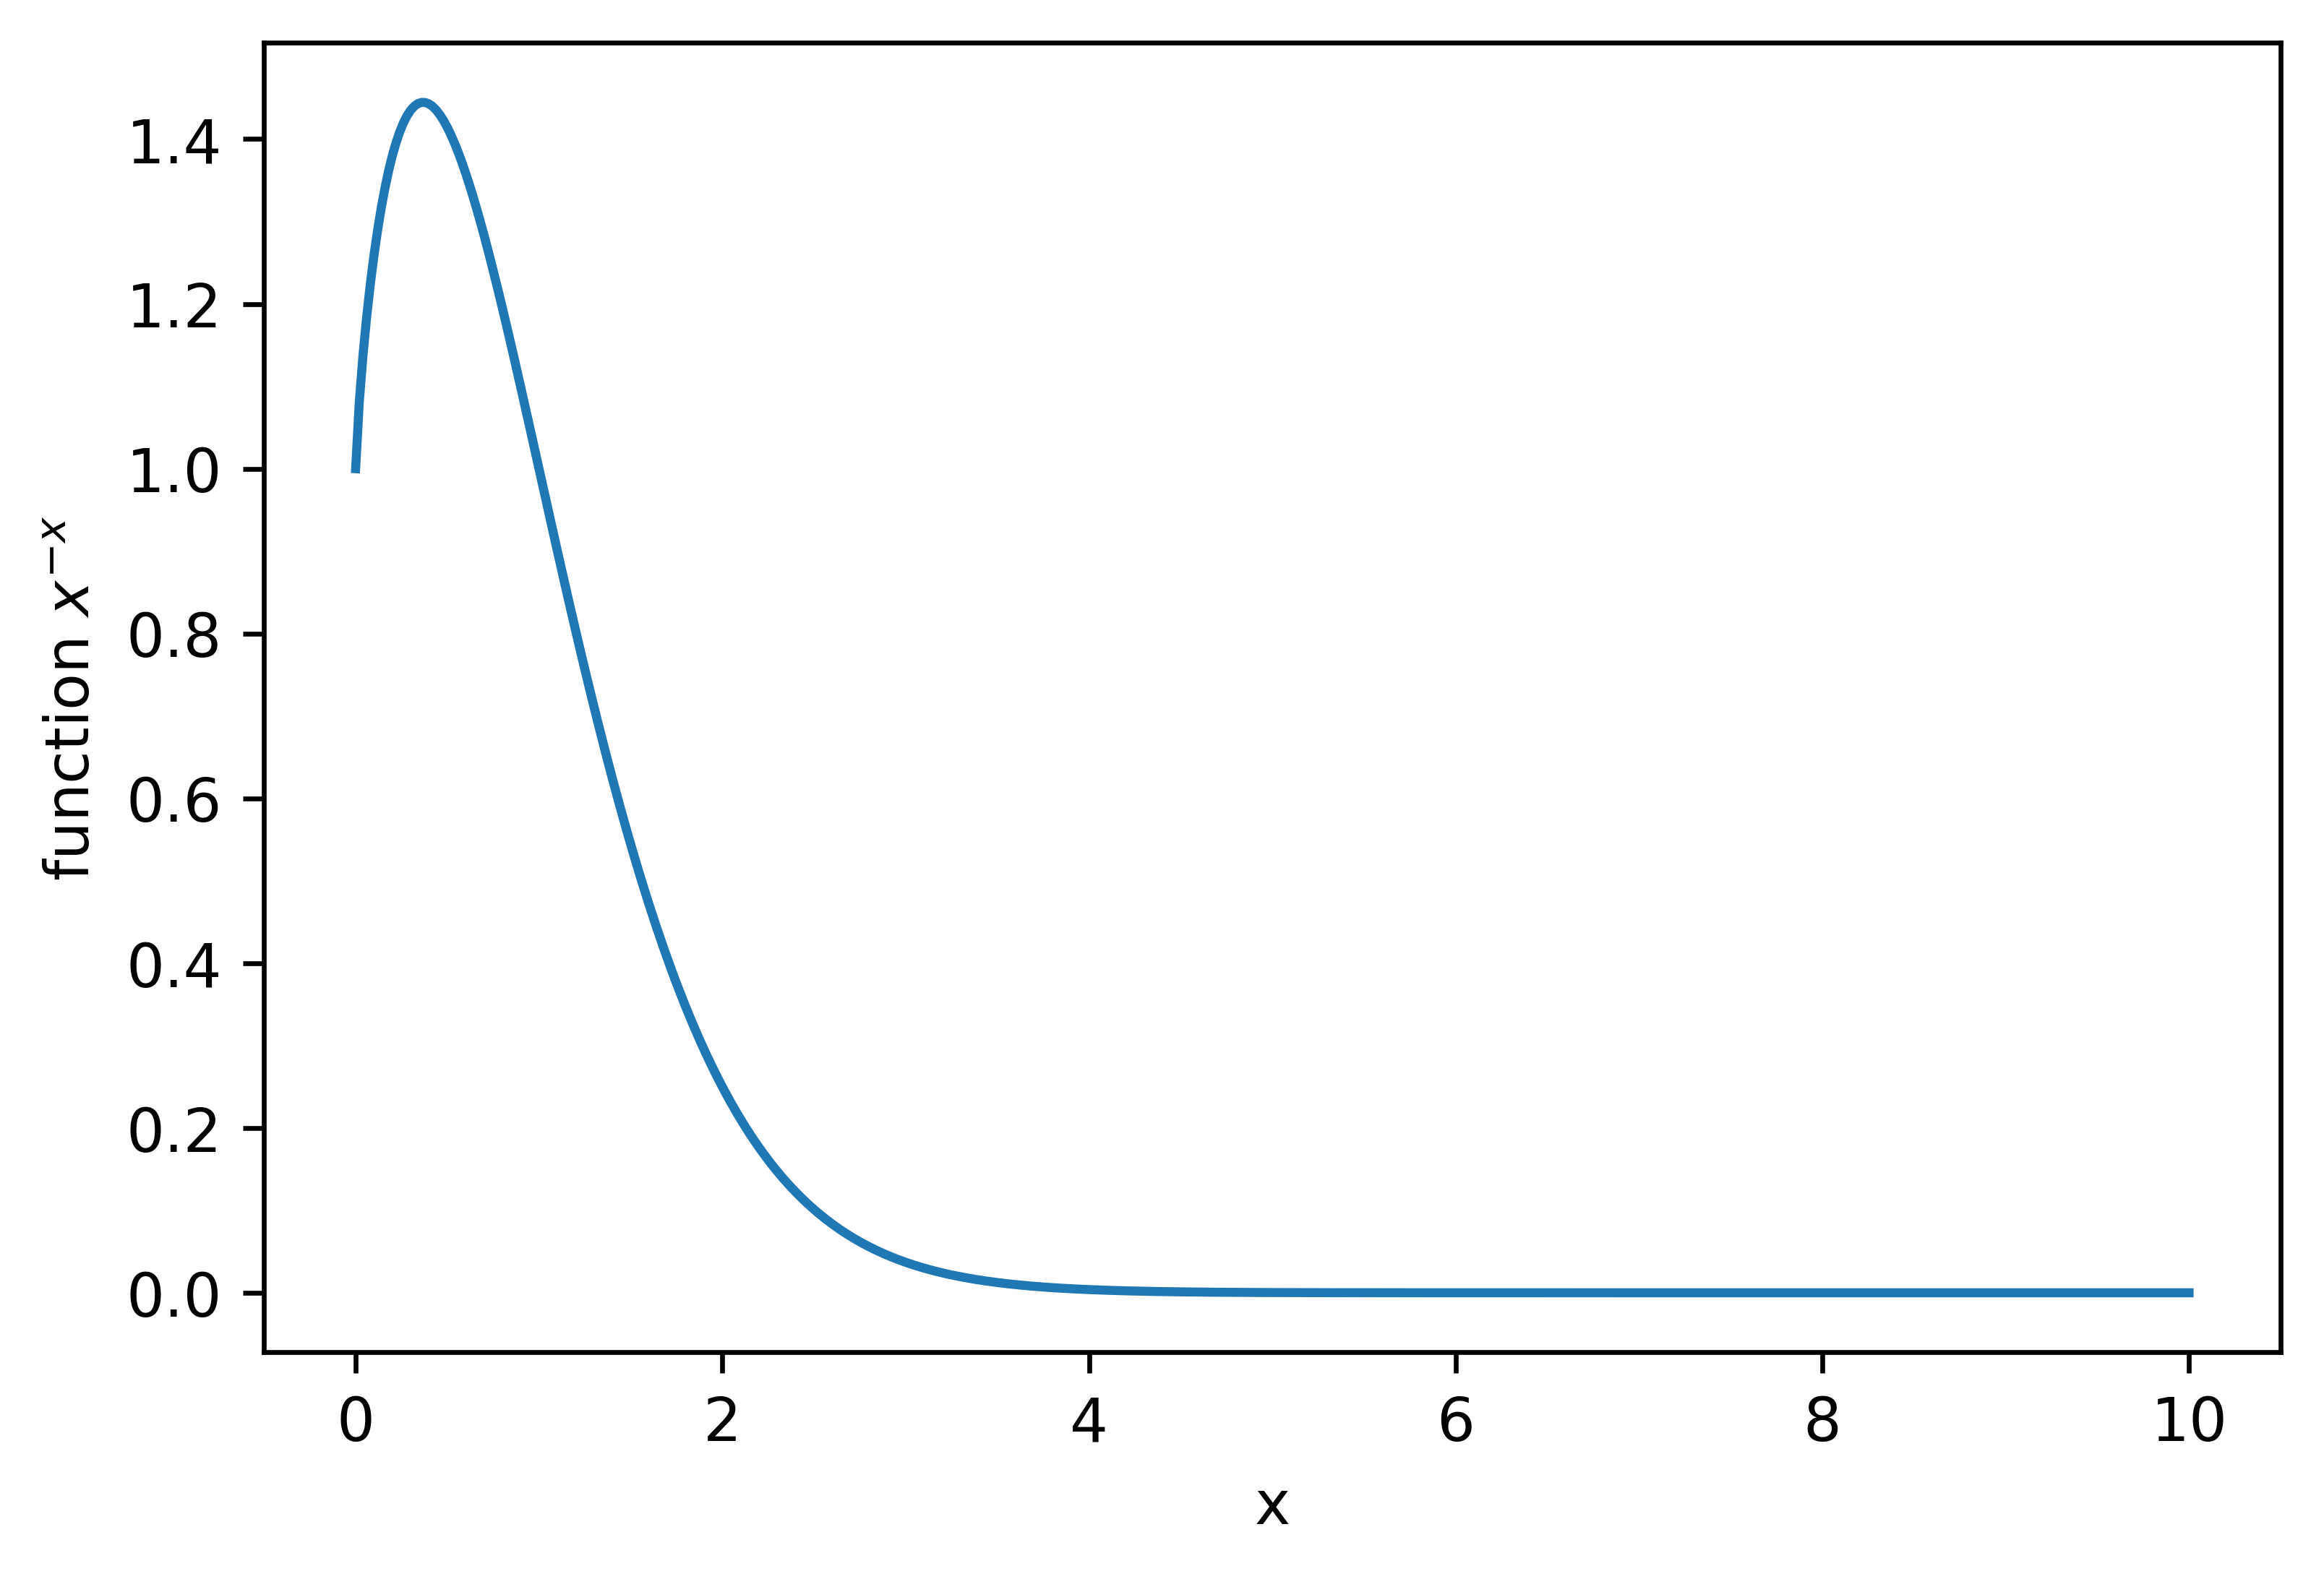

In [24]:
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(test_x,func)
plt.xlabel('x')
plt.ylabel('function $x^{-x}$')
#plt.savefig('images/x^x.png',bbox_inches='tight')

In [25]:
print(test_y[50]-test_y[0])
test_y[-1]-test_y[0]

[1.29126073]


array([1.9954509])

Text(0, 0.5, 'Anit-derivative of $x^{-x}$ using DNNI')

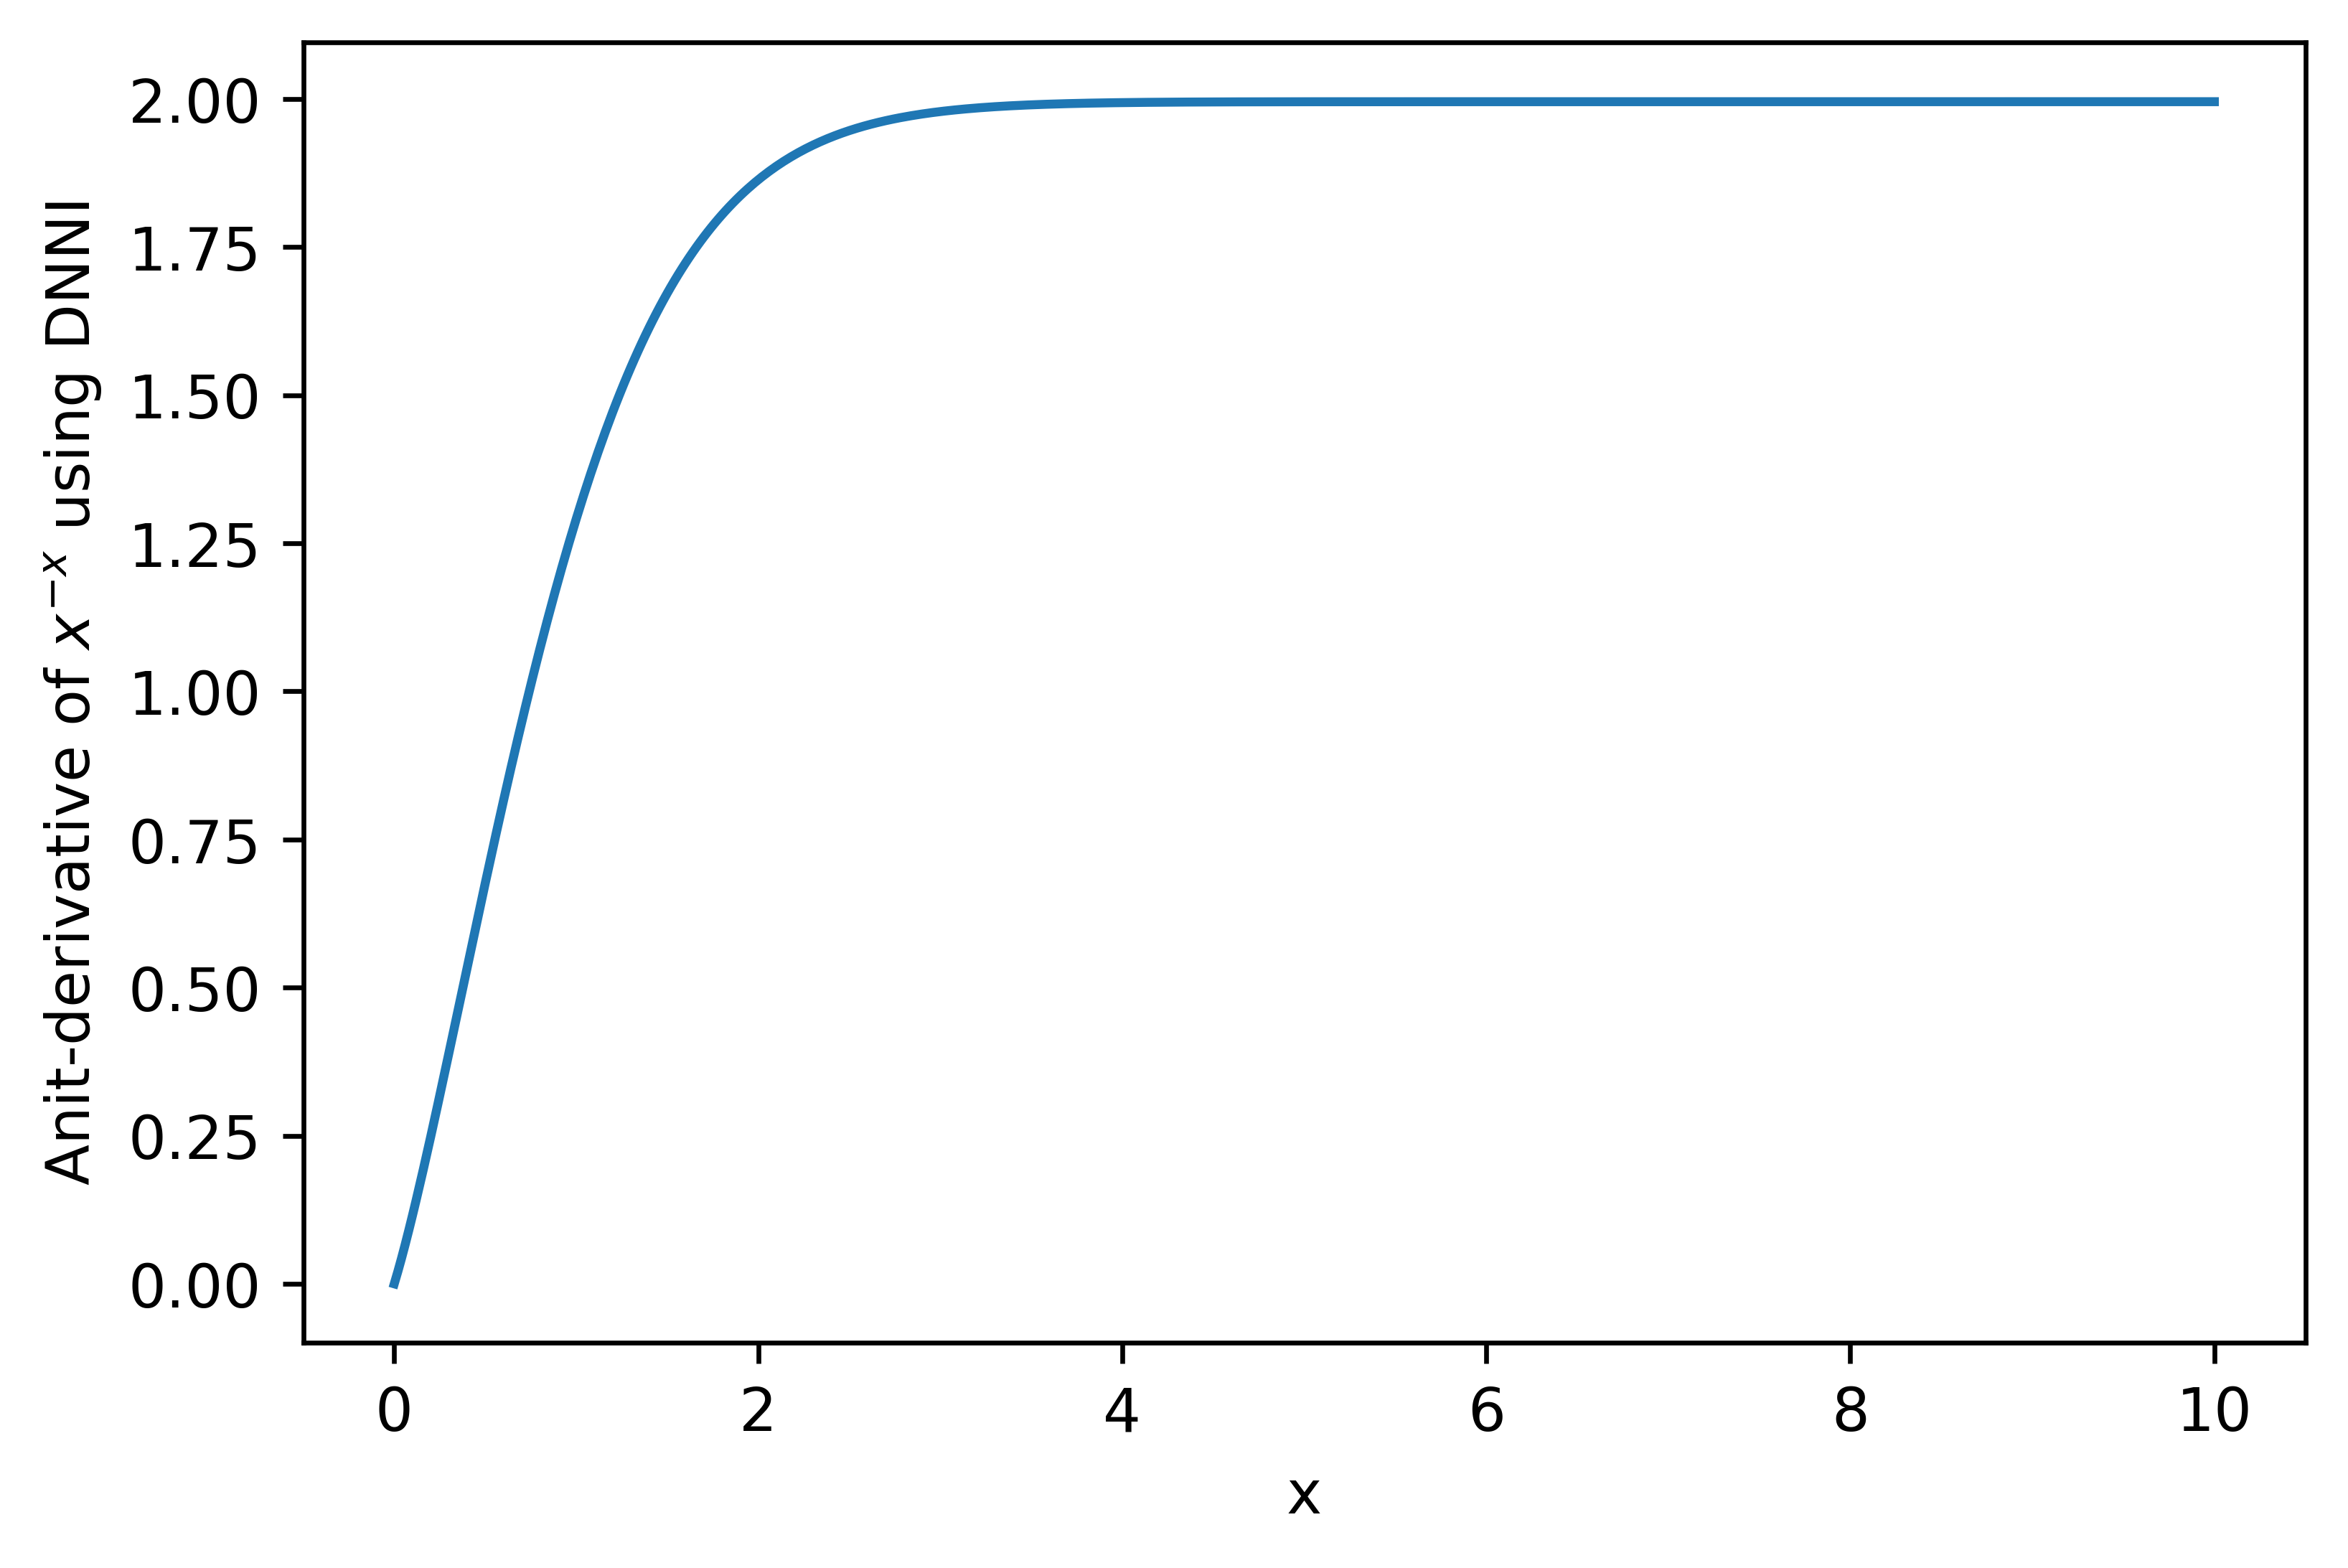

In [26]:
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(test_x,test_y-test_y[0])
plt.xlabel('x')
plt.ylabel('Anit-derivative of $x^{-x}$ using DNNI')
#plt.savefig('images/integral x^x.png',bbox_inches='tight')

In [27]:
l2_all = []
device2 = torch.device('cpu')
for j in range(5):
    l2_error = []
    for i in range(100):
        steps=2500
        x = torch.linspace(0,10,(i+1)*40).view(-1,1)
        layers = np.array([1,10,10,10,10,1])
        inn2 = DNNI.DNNI(layers,device2)
        inn2.to(device2)
        inn2.closure(steps=steps,x_train=x,int_f=f2,show=False)
        test_x = torch.linspace(0,10,501).view(-1,1)
        test_y = inn2(test_x).detach().cpu().numpy()
        y = (test_y[-1]-test_y[0])[0]
        actual = 1.99545595747012168979668516262699019513 #https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Bx%2C-x%5D%2C%7Bx%2C0%2C10%7D%5D
        l2_error.append(np.abs(y-actual))
    l2_all.append(l2_error)    

100%|██████████| 2500/2500 [00:05<00:00, 447.29it/s]


100%|██████████| 2500/2500 [00:03<00:00, 686.61it/s]


100%|██████████| 2500/2500 [00:06<00:00, 398.41it/s]


100%|██████████| 2500/2500 [00:09<00:00, 253.05it/s]


Text(0, 0.5, 'Mean L2_norm from actual result')

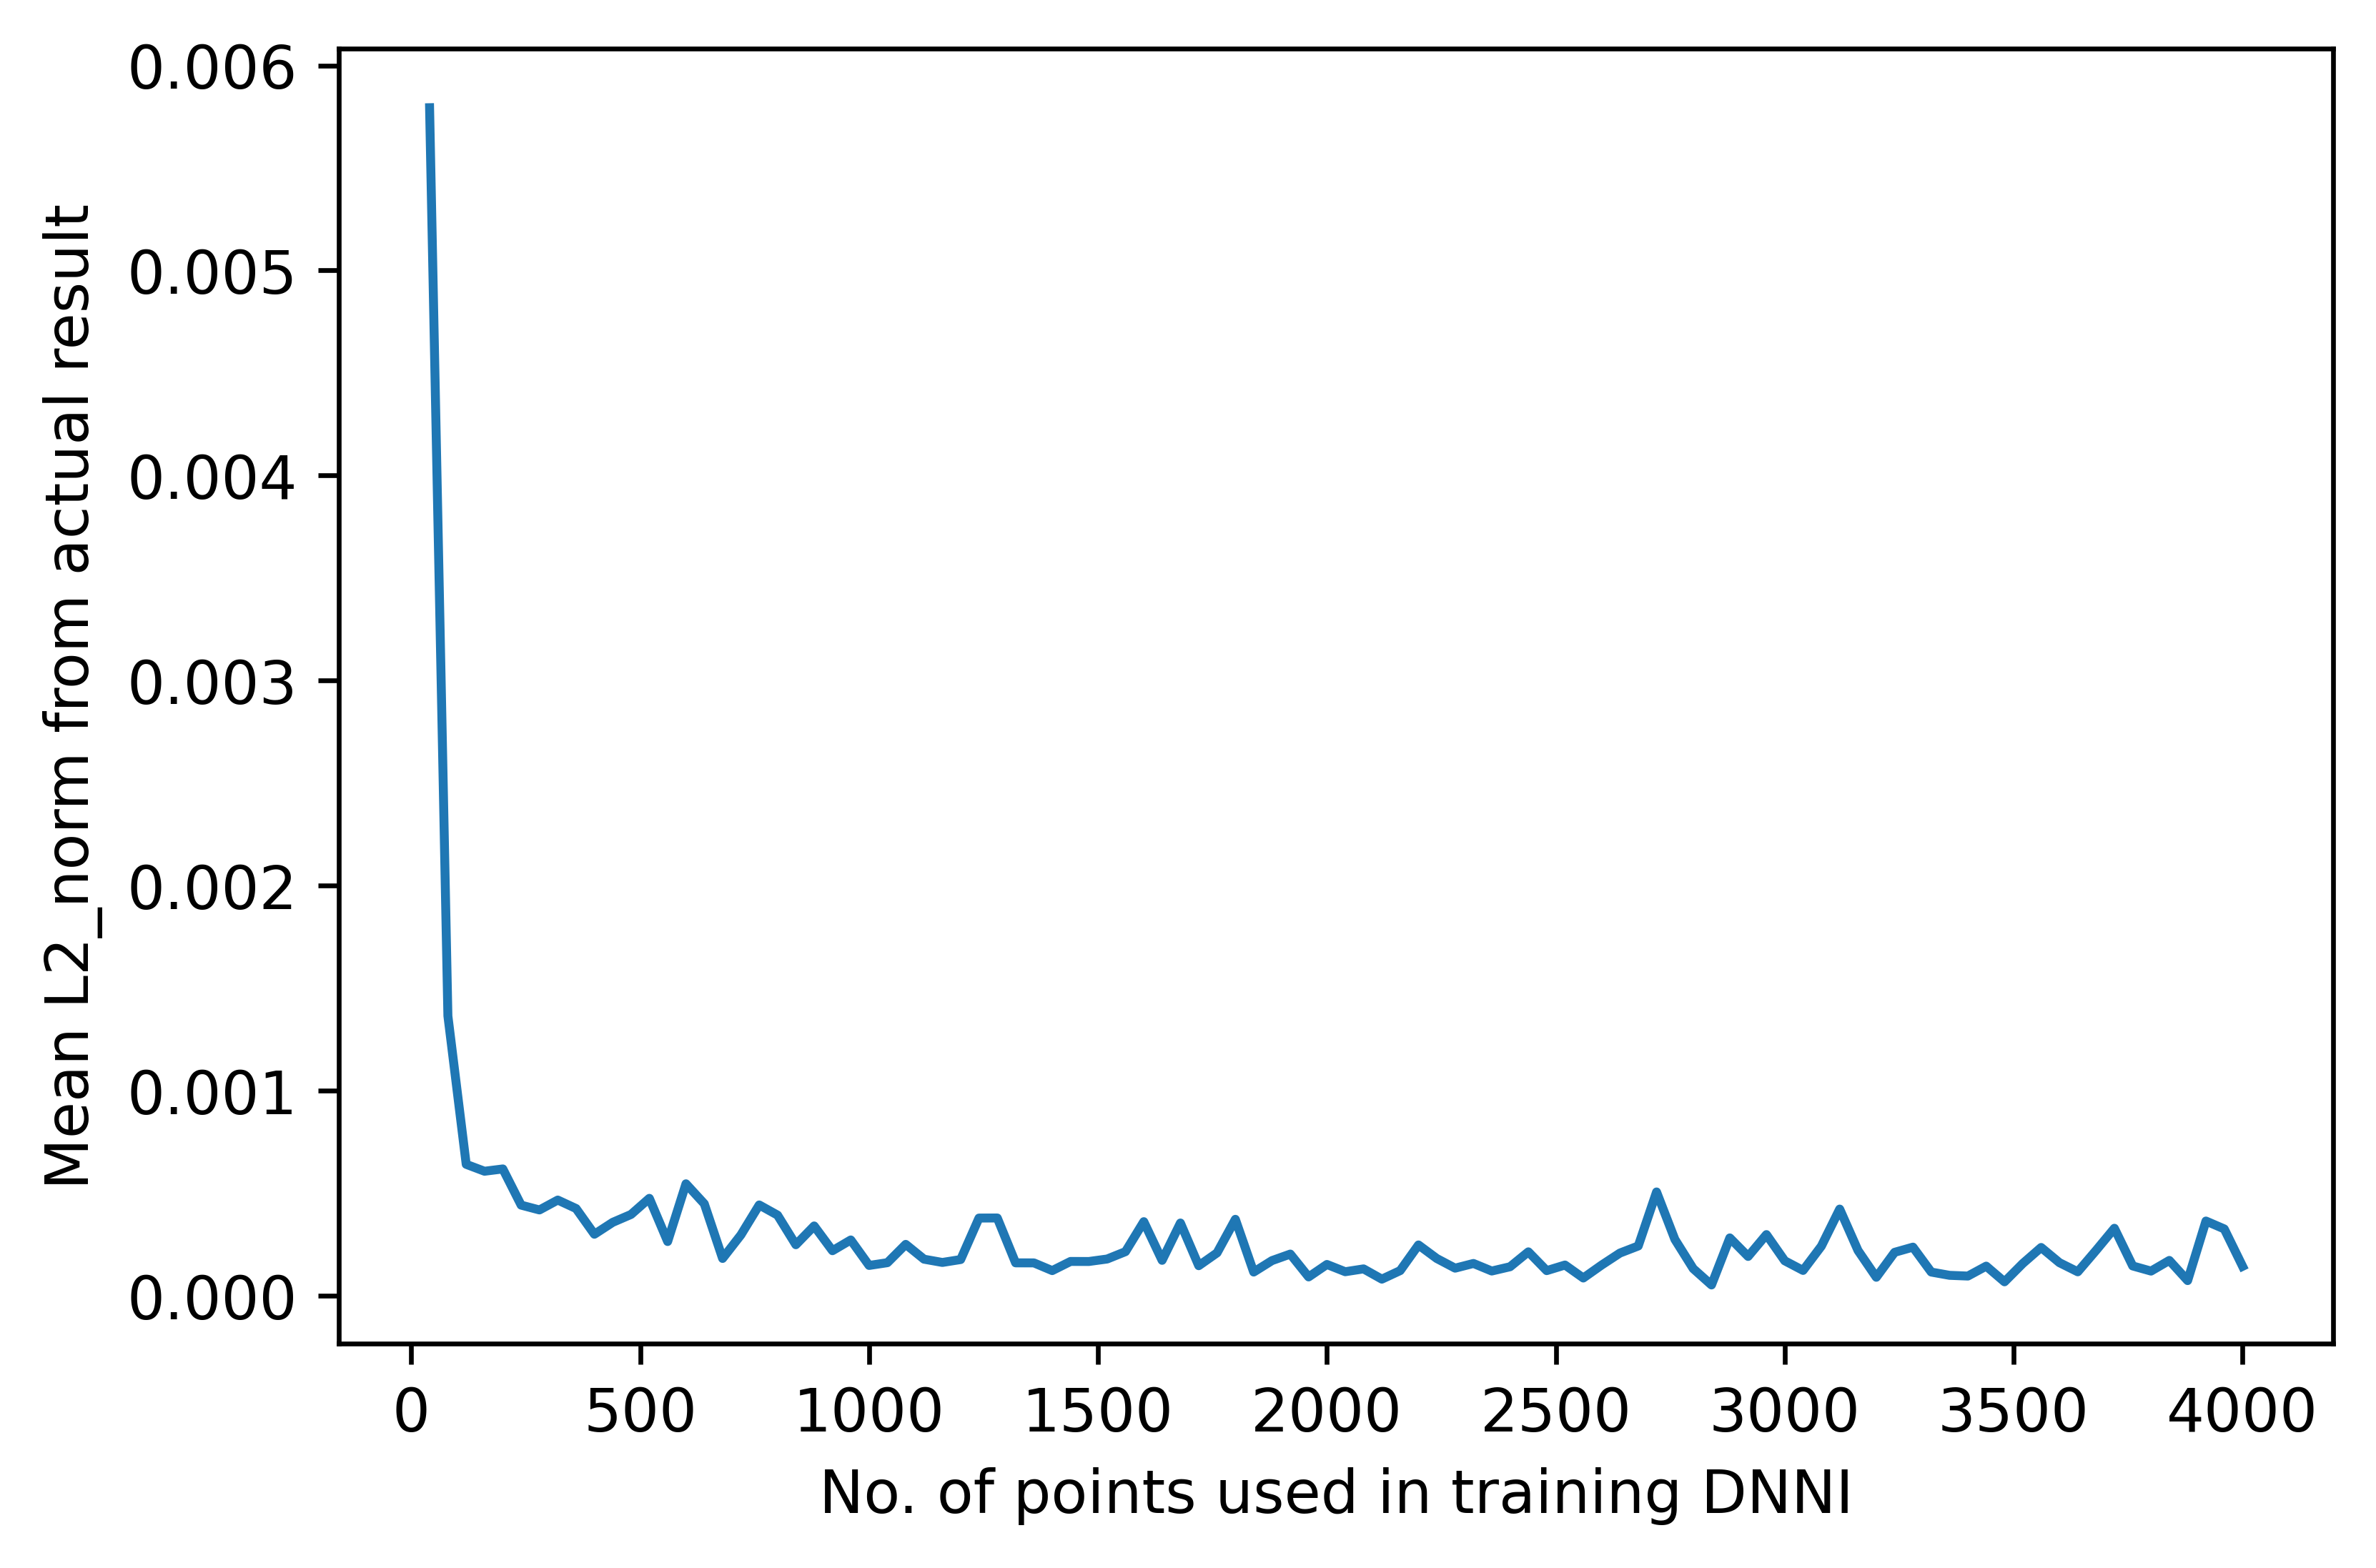

In [28]:
l2 = np.array(l2_all)
mean_l2 = (l2[0]+l2[1]+l2[2]+l2[3]+l2[4])/5

fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(np.linspace(40,4000,100),mean_l2)
plt.xlabel('No. of points used in training DNNI')
plt.ylabel('Mean L2_norm from actual result')

#plt.savefig('images/Case2_points.png',bbox_inches='tight')

# Example 3
$$    \int \frac{16x^3-42x^2+2x}{\sqrt{-16x^8+112x^7-204x^6+28x^5-x^4+1}} \,dx  = \sin^{-1}\left( 4x^4-14x^3+x^2 \right) + c$$

In [15]:
def f3(x):
    f =  (16*torch.pow(x,3)-42*torch.square(x)+2*x)/torch.sqrt(-16*torch.pow(x,8)+112*torch.pow(x,7)-204*torch.pow(x,6)+28*torch.pow(x,5)-torch.pow(x,4)+1)
    return f 

In [16]:
steps=10000
device = torch.device('cpu')
x = torch.linspace(0,0.34,100).view(-1,1)  #validity of integral in this range only
layers = np.array([1,10,10,10,10,1])
inn3 = DNNI.DNNI(layers,device)
inn3.to(device)
inn3.closure(steps=steps,x_train=x,int_f=f3,show=True)

  1%|          | 82/10000 [00:00<00:12, 811.26it/s]

Iter:  0 Loss:  2.9869629675791844  lr:  0.01


 26%|██▋       | 2625/10000 [00:03<00:08, 842.55it/s]

Iter:  2500 Loss:  0.0002738767037269948  lr:  0.002


 51%|█████▏    | 5130/10000 [00:05<00:04, 978.57it/s]

Iter:  5000 Loss:  5.027133823291036e-05  lr:  0.0004


 77%|███████▋  | 7682/10000 [00:08<00:02, 972.26it/s]

Iter:  7500 Loss:  3.171191576656811e-05  lr:  8e-05


100%|██████████| 10000/10000 [00:11<00:00, 891.22it/s]

MSE :  2.4013113670071337e-05


In [17]:
test_x = torch.linspace(0,0.34,20).view(-1,1)
test_y = inn3(test_x).detach().cpu().numpy()
test_y[-1]-test_y[0]

array([-0.39114963])

In [18]:
actual = np.arcsin(4*test_x**4-14*test_x**3+test_x**2)

fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')

plt.plot(test_x,test_y-test_y[0],'b-',label='DNNI')
plt.plot(test_x,actual,'y--',label='Theoretical')
plt.ylabel('Antiderivative')
plt.xlabel('x')
plt.legend()
#plt.savefig('images/tough2.png',bbox_inches='tight')